### Get Your Guide - Search Engine Marketing

This document contains both the python source code as well as the reasoning behind the metrics chosen and how marketing can be improved.

### 1. Load Data

Let us first start by loading the sample data using pandas

In [2]:
import pandas as pd
df = pd.read_csv('take_home_test_data.csv')

In [3]:
#Using the inbuilt aggregating functions
df.describe()

,Impressions,CTR,Cost,Position,Revenue
count,248423.000000,248423.000000,248423.000000,248423.000000,248423.000000
mean,120.444101,0.074117,1.849001,2.749399,276.708866
std,644.427170,0.068256,19.689829,1.477798,1532.379864
min,5.000000,0.000100,0.000000,1.000000,0.370000
25%,14.000000,0.027400,0.100000,2.000000,30.890000
50%,28.000000,0.054200,0.300000,3.000000,74.800000
75%,69.000000,0.098200,0.910000,4.000000,192.545000
max,82024.000000,0.857100,6624.620000,6.000000,224856.750000


In [4]:
#Check the first row of data
df.head(1)

,Search keyword,Impressions,CTR,Cost,Position,Company,Revenue
0,alanya tours,21,0.0476,0.12,1,Company A,76.74


In [5]:
# Add total number of clicks to all rows and verify the same row we viewed before
df['Clicks'] = df['CTR'] * df['Impressions']
df.head(1)

,Search keyword,Impressions,CTR,Cost,Position,Company,Revenue,Clicks
0,alanya tours,21,0.0476,0.12,1,Company A,76.74,0.9996


### 2. Establish a Performance Metric
Let's use <b>ROI (Return on Investment)</b> as the Performance Metric since it is the most efficient measurement of how well a specific advertisement or campaign or even a goal has performed. It is nothing but the returns you get from the ads you spend money on. ROI is defined with the following formula. <b>(Revenue - Cost) / Cost </b>

### 3. Understand how Companies fare vs each other
Calculate the various aggregate functions including ROI of all the companies and see how they are peforming against each other. Later see how they can be improved.

In [6]:
# Aggregate Metrics by Company
df_companies = df.groupby(['Company']).agg({
    'Search keyword':'nunique',
    'Impressions':'sum',
    'Clicks':'sum',
    'Cost':'sum',
    'Revenue':'sum',
}).reset_index()

# Calculate CTR
df_companies['CTR'] = df_companies['Clicks'] / df_companies['Impressions']
# Calculate ROI
df_companies['ROI'] = (df_companies['Revenue'] - df_companies['Cost']) / df_companies['Cost']

df_companies

,Company,Impressions,Search keyword,Revenue,Clicks,Cost,CTR,ROI
0,Company A,4371783,23070,10032952.39,190972.5362,66600.98,0.043683,149.642714
1,Company B,4552075,23041,10034830.17,196594.5690,65723.44,0.043188,151.682668
2,Company C,4576889,23065,10367789.86,196376.6422,67905.21,0.042906,151.680330
3,Company D,4411274,23054,9815292.58,188313.9405,67284.52,0.042689,144.877426
4,Company E,4404764,23193,9825982.25,189180.9100,65737.95,0.042949,148.471991
5,GetYourGuide,7604300,30394,18663999.35,350676.6463,126082.37,0.046116,147.030207


<b>We can see that GetYourGuide</b>
* has much more Search Keywords than the rest, and as a consequence, more Clicks/Revenue/Cost
* has the best Click Through Rate
* doesn't perform that well on ROI (relatively speaking)

### Improving Performance
As a first step to improve ROI, we need to identify those Search Keywords that dont perform that well, and remove them.

### 4. Analyzing GetYourGuide's Keyword Performance

In [7]:
# Filter dataset for GetYourGuide
df_gyg = df[df['Company']=='GetYourGuide']

# Aggregate data by search term 
df_gyg_kw = df_gyg.groupby(['Company','Search keyword']).agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Cost':'sum',
    'Revenue':'sum',
}).reset_index()

# Calculate CTR
df_gyg_kw['CTR'] = df_gyg_kw['Clicks'] / df_gyg_kw['Impressions']
# Calculate ROI
df_gyg_kw['ROI'] = (df_gyg_kw['Revenue'] - df_gyg_kw['Cost']) / df_gyg_kw['Cost']

df_gyg_kw.head(1)

,Company,Search keyword,Impressions,Cost,Clicks,Revenue,CTR,ROI
0,GetYourGuide,1 day cruise from athens,14,2.49,3.3222,79.54,0.2373,30.943775


### 5. Lets visualize how keyword performance varies by Clicks and ROI

We can have a better understanding of the performance from a visual representation of the data. For this we use matplotlib to plot a graph between Clicks and ROI. We can then find the ads/search words that are not performing well.

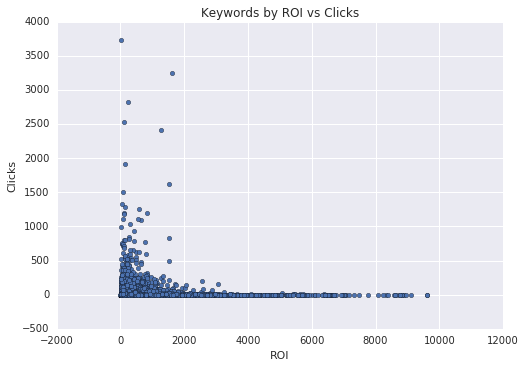

In [8]:
from matplotlib import pyplot as plt 
import seaborn as sns

df_gyg_kw.plot(kind='scatter',x='ROI',y='Clicks')
plt.title('Keywords by ROI vs Clicks')
plt.show()

<b>Lets look at the same plot but excluding outliers</b>

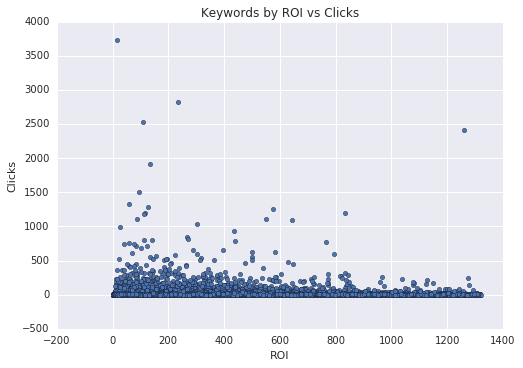

In [9]:
percentile = 0.95
q = df_gyg_kw["ROI"].quantile(percentile)
df_gyg_kw_excl = df_gyg_kw[df_gyg_kw["ROI"] < q]
df_gyg_kw_excl.plot(kind='scatter',x='ROI',y='Clicks')
plt.title('Keywords by ROI vs Clicks')
plt.show()

### 6. Time to Optimize!
Ideally you want to be in the Top Right quadrant of the plot, but reality is several of the Keywords are clustered around the Bottom Left Quadrant.

In order to identify and exclude the worst performing Keywords, let's set an <b>ROI Target<b> and stop all the Ads for the underperforming Keywords</b>

In [10]:
ROI_TARGET = 100
# Filter the datset, exclude underperformers
df_gyg_filtered = df_gyg_kw[df_gyg_kw['ROI']>=ROI_TARGET]

In [11]:
# Aggregate the data
df_gyg_agg = df_gyg_filtered.groupby(['Company']).agg({
    'Search keyword':'nunique',
    'Impressions':'sum',
    'Clicks':'sum',
    'Cost':'sum',
    'Revenue':'sum',
}).reset_index()

# Calculate CTR
df_gyg_agg['CTR'] = df_gyg_agg['Clicks'] / df_gyg_agg['Impressions']
# Calculate ROI
df_gyg_agg['ROI'] = (df_gyg_agg['Revenue'] - df_gyg_agg['Cost']) / df_gyg_agg['Cost']

df_gyg_agg

,Company,Impressions,Search keyword,Revenue,Clicks,Cost,CTR,ROI
0,GetYourGuide,6124768,24862,15515252.29,277092.9754,54907.32,0.045241,281.571655


<b>Let's compare the actual performance with the performance we would have, if we cut out all the underperforming Keywords</b>

In [12]:
# Add the original performance data to the filtered performance data
df_gyg_original = df_companies[df_companies['Company']=='GetYourGuide']
df_gyg_merged = df_gyg_original.merge(df_gyg_agg,on='Company')

In [13]:
# Calculate the percentage change in the key metrics
for col in ['Search keyword','Impressions','Clicks','Cost','Revenue','CTR','ROI']:
    df_gyg_merged[col + '_delta'] = (df_gyg_merged[col+'_y'] - df_gyg_merged[col+'_x']) / df_gyg_merged[col+'_x']

df_gyg_delta = df_gyg_merged[['Company','Search keyword_delta','Impressions_delta','Clicks_delta','Cost_delta','Revenue_delta','CTR_delta','ROI_delta']]

In [14]:
df_gyg_delta

,Company,Search keyword_delta,Impressions_delta,Clicks_delta,Cost_delta,Revenue_delta,CTR_delta,ROI_delta
0,GetYourGuide,-0.18201,-0.194565,-0.209833,-0.564512,-0.168707,-0.018956,0.91506


### Optimization Result

Based on our ROI Target, and pausing the underperforming Ads/Keywords:
* We dropped 18% of Keywords, and our total Impressions went down 19%
* While Revenue dropped 16%, the total Cost has dropped an <b>amazing 56%</b> , causing ROI to go up by <b>91%</b>

### Improved Solution

The current solution looks really attractive with the costs having gone down so much and the ROI having improved so much, but there are some areas where it can be made efficient with more time spent on it. 

In the current solution, the search words with low ROI are removed completely irrespective of their performances compared to other companies. If the ROI of these search terms are compared to the other companies and only the ones that are performing badly are removed, it would lead to an inreased revenue. 